In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## if using google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# file renamed to austo_automobile.csv, it had some other characters as well
## For Google Drive
# path="/content/drive/MyDrive/GL_AIML/AppliedStatistics_Projects/austo_automobile.csv"
path = './austo_automobile.csv'
auto_df = pd.read_csv(path)

In [4]:
auto_df.sample(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1438,23,Male,Salaried,Married,Graduate,3,No,No,Yes,30100,30400.0,60500,27000,Sedan
69,53,Female,Salaried,Married,Graduate,3,Yes,No,Yes,72000,40800.0,112800,66000,SUV
991,27,Male,Business,Married,Post Graduate,3,No,Yes,Yes,65500,32600.0,98100,28000,Hatchback
1486,23,NaN,Salaried,Married,Graduate,4,Yes,Yes,No,31100,0.0,31100,18000,Sedan
60,54,Female,Salaried,Married,Post Graduate,3,Yes,No,No,85100,0.0,85100,54000,SUV


### Technical information about the data

In [5]:
auto_df.shape

(1581, 14)

Rows: 1581</br>
Columns: 14

In [6]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


Out of the 14 columns:
- int: 5
- float: 1
- object: 8

### Treating Null Values and Duplicate Values

In [7]:
auto_df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

<b>Gender</b> and <b>Partner_salary</b> columns have Null values.

In [8]:
auto_df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [9]:
# Imputing Null values in Gender using mode i.e. Male.
auto_df['Gender'].fillna(auto_df['Gender'].mode()[0], inplace = True)

In [10]:
auto_df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

The Partner_salary column, as we observed, has a role to play in deducing Total_salary column.</br>
Total_salary = Salary + Partner_salary

In [11]:
auto_df[auto_df.Total_salary != (auto_df.Partner_salary + auto_df.Salary)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


As observed, the Total_salary is not equal to the sum of Partner_salary and Salary only where Partner_salary is Null. Lets use Total_salary - Salary to impute Partner_salary wherever it is Null.

In [12]:
auto_df.Partner_salary.fillna(value=auto_df.Total_salary-auto_df.Salary, inplace=True)

In [13]:
# checking for calcluation of Total_salary column again
auto_df[auto_df.Total_salary != (auto_df.Partner_salary + auto_df.Salary)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [14]:
auto_df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [15]:
auto_df.duplicated().sum()

0

There are no duplicate records in the data set.

### Univariate Analysis
- Analyse each variable individually and draw insights
- Treat anomalies in categorical variable if any
- Treat outliers in numerical variable if any

#### Numerical Variables

In [16]:
auto_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [17]:
numeric_columns = auto_df.select_dtypes(['int','float']).columns
numeric_columns

Index(['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary',
       'Price'],
      dtype='object')

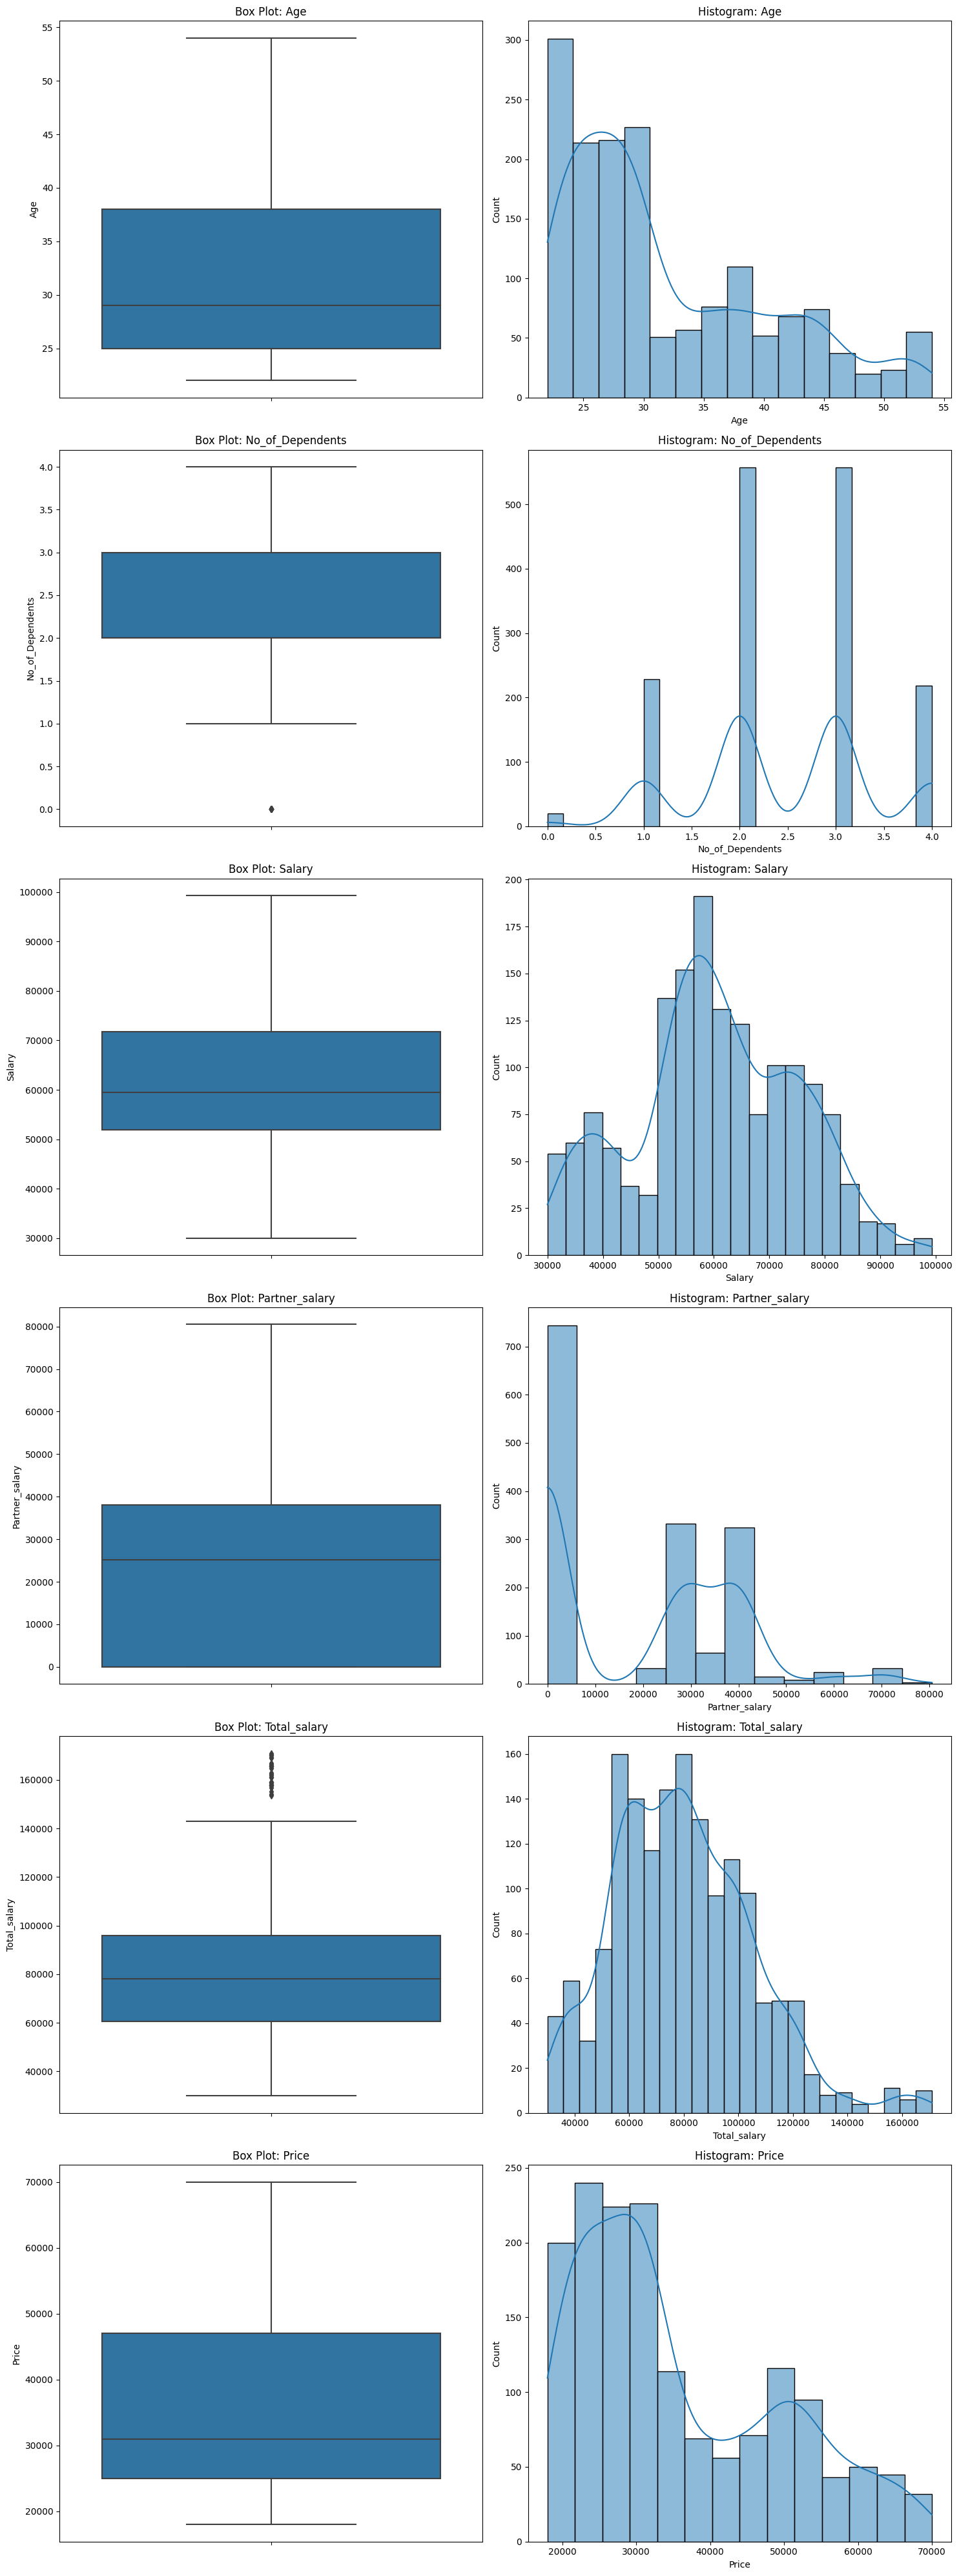

In [18]:
plt.figure(figsize=(15,40))
c = 1
for i in numeric_columns:
    plt.subplot(6,2,c)
    sns.boxplot(data=auto_df, y=i)
    plt.title(f'Box Plot: {i}')
    plt.subplot(6,2,c+1)
    sns.histplot(data=auto_df, x=i, kde=True)
    plt.title(f'Histogram: {i}')
    c += 2

plt.tight_layout();

<b>Insights for Numerical Variables</b>
- No variable is following a proper normal distribution
- 75% percent of customers are below the age of 40
- No_of_Dependents is defined as a numerical variable, but it can pass for a categorical variable. The value of 0 is an outlier but that is valid as many of the customers don't have any dependents, which is alright.
- Salary of the customers ranges from 30k to almost 100k.
- Partner_salary is 0 for many customers indicating that their partner doesn't earn.
- Total_salary is a deduced variable from Salary and Partner_salary but that has outliers. We will be treating those outliers.
- On an average, the price of a car sold by Austo Motors is nearly 36k, but ranges from 18k to 70k.

<b>Outlier treatment for Total_salary column</b>

In [19]:
# IQR for Total_salary
# IQR = 3rd Quartile - 1st Quartile OR 75% - 25% value from 5-point summary
iqr_total_salary = auto_df.Total_salary.quantile(q=0.75)-auto_df.Total_salary.quantile(q=0.25)
iqr_total_salary

35400.0

In [20]:
# using IQR we define Lower Range and Upper Range of the data
# LR = 25% value - 1.5xIQR
# UR = 75% value + 1.5xIQR
lr = auto_df.Total_salary.quantile(q=0.25) - (1.5*iqr_total_salary)
ur = auto_df.Total_salary.quantile(q=0.75) + (1.5*iqr_total_salary)
lr,ur

(7400.0, 149000.0)

In [21]:
# the data between LR and UR will be outlier free
auto_df[(auto_df.Total_salary < lr) | (auto_df.Total_salary > ur)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100,70600.0,165700,64000,SUV
18,49,Female,Business,Married,Post Graduate,3,No,No,Yes,92600,70300.0,162900,58000,SUV
19,49,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400,60600.0,159000,54000,SUV
29,46,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300,70700.0,169000,61000,SUV
30,46,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900,70700.0,165600,67000,SUV
31,46,Male,Business,Married,Graduate,2,Yes,No,Yes,91100,70000.0,161100,66000,SUV
41,53,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600,70300.0,166900,66000,SUV


In [22]:
auto_df[(auto_df.Total_salary < lr) | (auto_df.Total_salary > ur)].Total_salary.count()

27

One way to treat outliers with the boxplot(5 point summary) method is to change the value of the column to LR and UR wherever they are greater. But as this column is a derived column that will change the main calculation behind it.</br>
As there are only 27 such values, which are very less as compared to all data, we can remove these records completely from the dataset to have a cleaner data.

In [23]:
auto_df = auto_df[(auto_df.Total_salary > lr) & (auto_df.Total_salary < ur)]

In [24]:
auto_df.shape

(1554, 14)

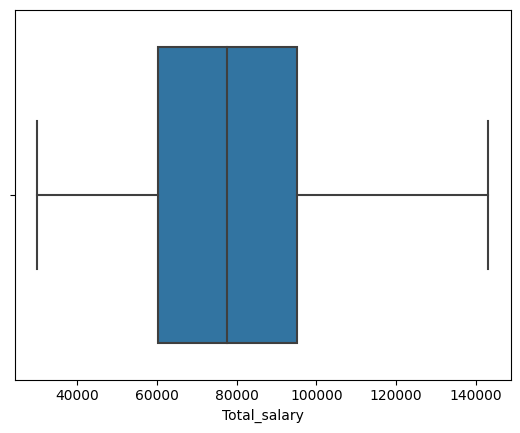

In [25]:
sns.boxplot(data=auto_df, x='Total_salary');

#### Categorical Variables

In [26]:
categorical_columns = auto_df.select_dtypes(['object', 'bool']).columns
categorical_columns

Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make'],
      dtype='object')

In [27]:
for i in categorical_columns:
    print(f'\n==== {i} ====')
    print(auto_df[i].unique())
    print(auto_df[i].value_counts())


==== Gender ====
['Female' 'Male' 'Femle']
Gender
Male      1239
Female     314
Femle        1
Name: count, dtype: int64

==== Profession ====
['Salaried' 'Business']
Profession
Salaried    877
Business    677
Name: count, dtype: int64

==== Marital_status ====
['Married' 'Single']
Marital_status
Married    1416
Single      138
Name: count, dtype: int64

==== Education ====
['Graduate' 'Post Graduate']
Education
Post Graduate    964
Graduate         590
Name: count, dtype: int64

==== Personal_loan ====
['Yes' 'No']
Personal_loan
Yes    785
No     769
Name: count, dtype: int64

==== House_loan ====
['No' 'Yes']
House_loan
No     1027
Yes     527
Name: count, dtype: int64

==== Partner_working ====
['Yes' 'No']
Partner_working
Yes    841
No     713
Name: count, dtype: int64

==== Make ====
['SUV' 'Sedan' 'Hatchback']
Make
Sedan        702
Hatchback    582
SUV          270
Name: count, dtype: int64


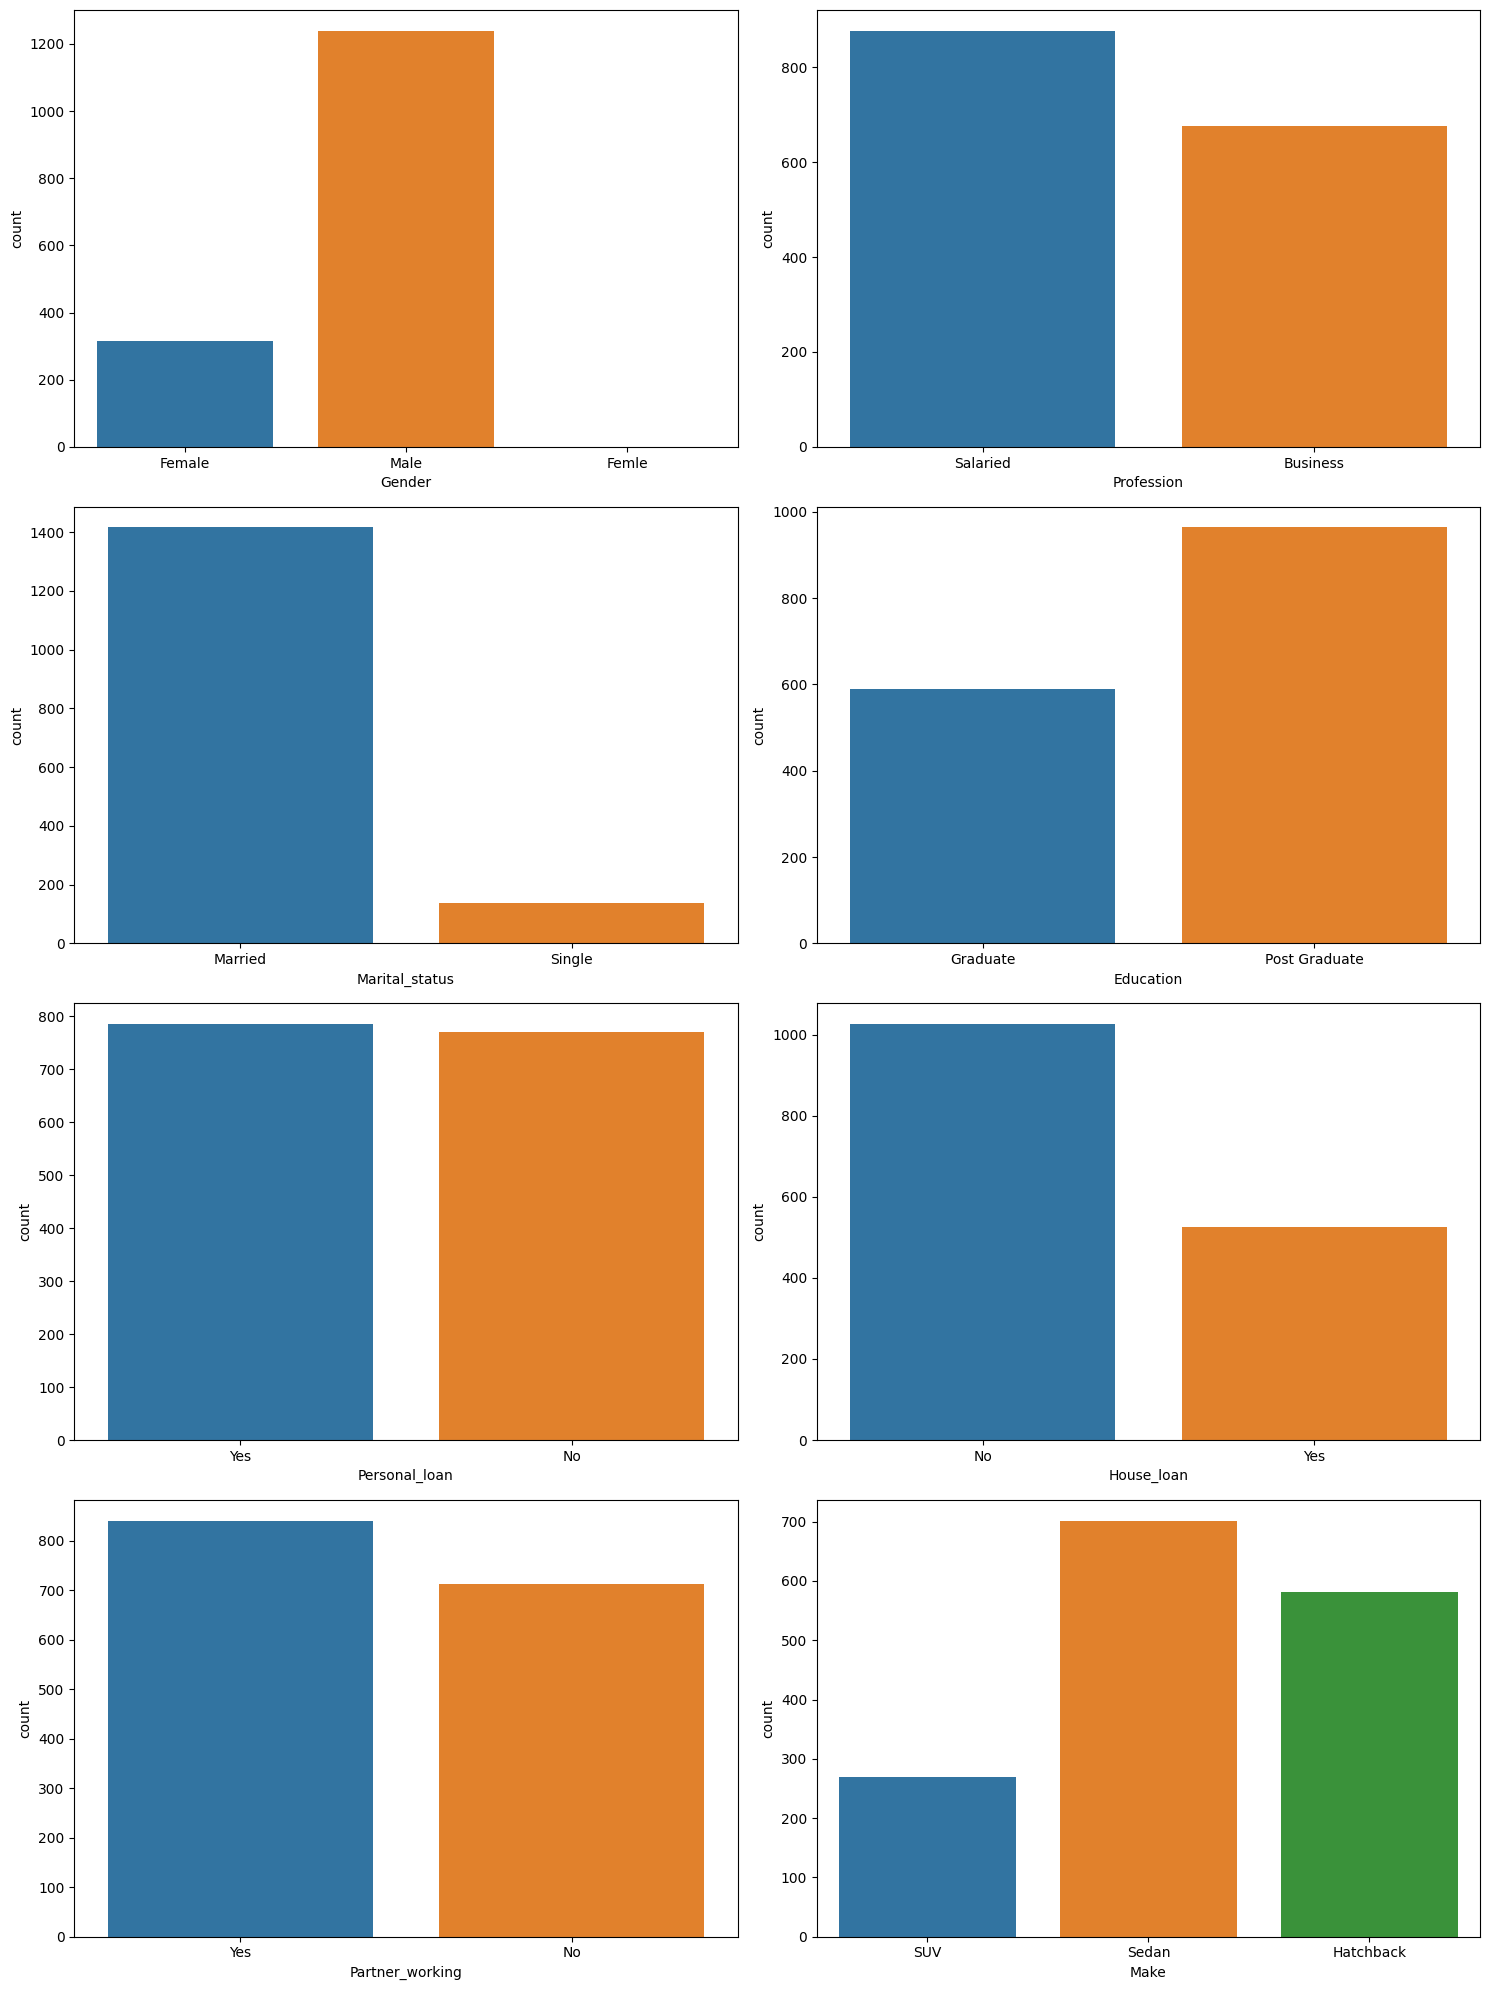

In [28]:
plt.figure(figsize=(15,20))
c = 1
for i in categorical_columns:
    plt.subplot(4,2,c)
    sns.countplot(data=auto_df, x=i)
    c += 1
plt.tight_layout();

<b>Insights for Categorical Variables</b>
- Gender has an anomalous value of 'Femle' which we have to treat as 'Female'. Also, from the data majority of the customer are Male.
- The car buying quotient of Married people is much higher than that of Unmarried people.
- There is no impact of a Personal Loan on whether a custom can buy car or not.
- Sedan type cars are preferred much over SUV and Hatchback.
- Having a house loan might impact the car buying capacity of an individual as a lot of investment goes in house loan already. So, people who don't have a house loan purchase a car is more likely.

<b>Anomalous value treatment for Gender</b>

In [29]:
auto_df['Gender'] = np.where(auto_df['Gender'] == 'Femle','Female',auto_df['Gender'])

In [30]:
auto_df['Gender'].value_counts()

Gender
Male      1239
Female     315
Name: count, dtype: int64

### Bivariate Analysis
- Numerical v/s Numerical
- Categorical v/s Categorical
- State insights from the analysis

#### Numerical v/s Numerical

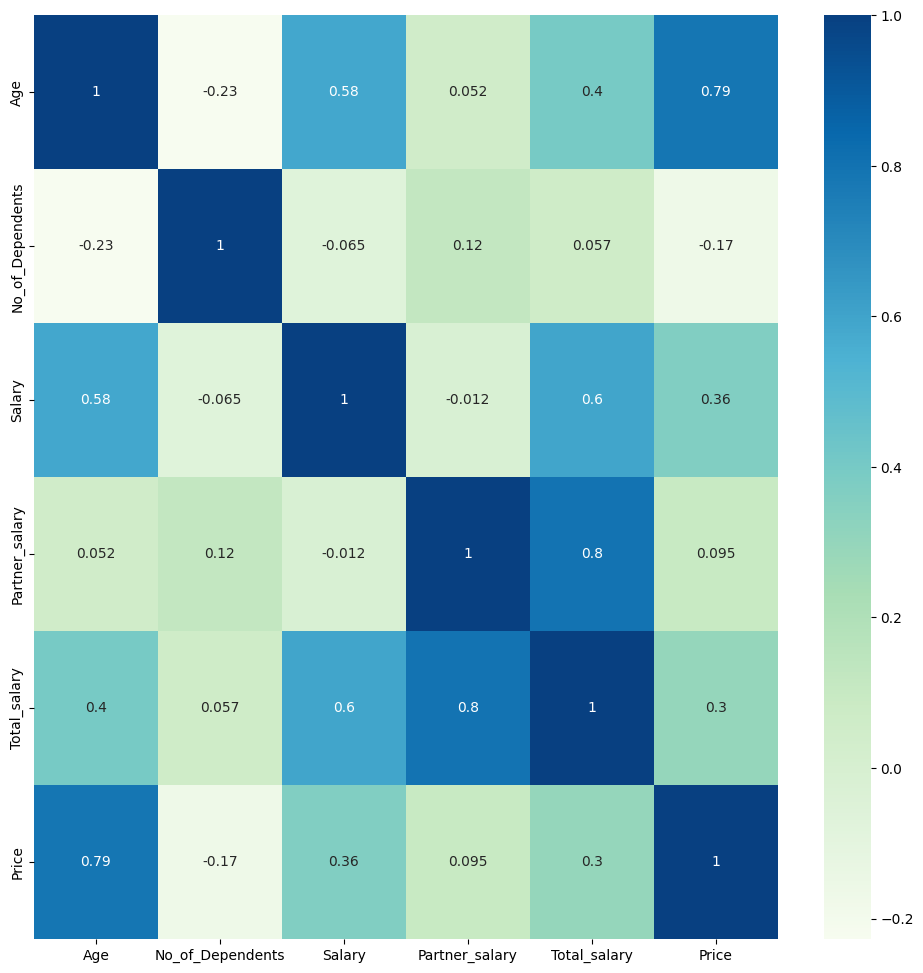

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(auto_df.corr(numeric_only=True), annot = True, cmap='GnBu');

/Users/appurohi/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

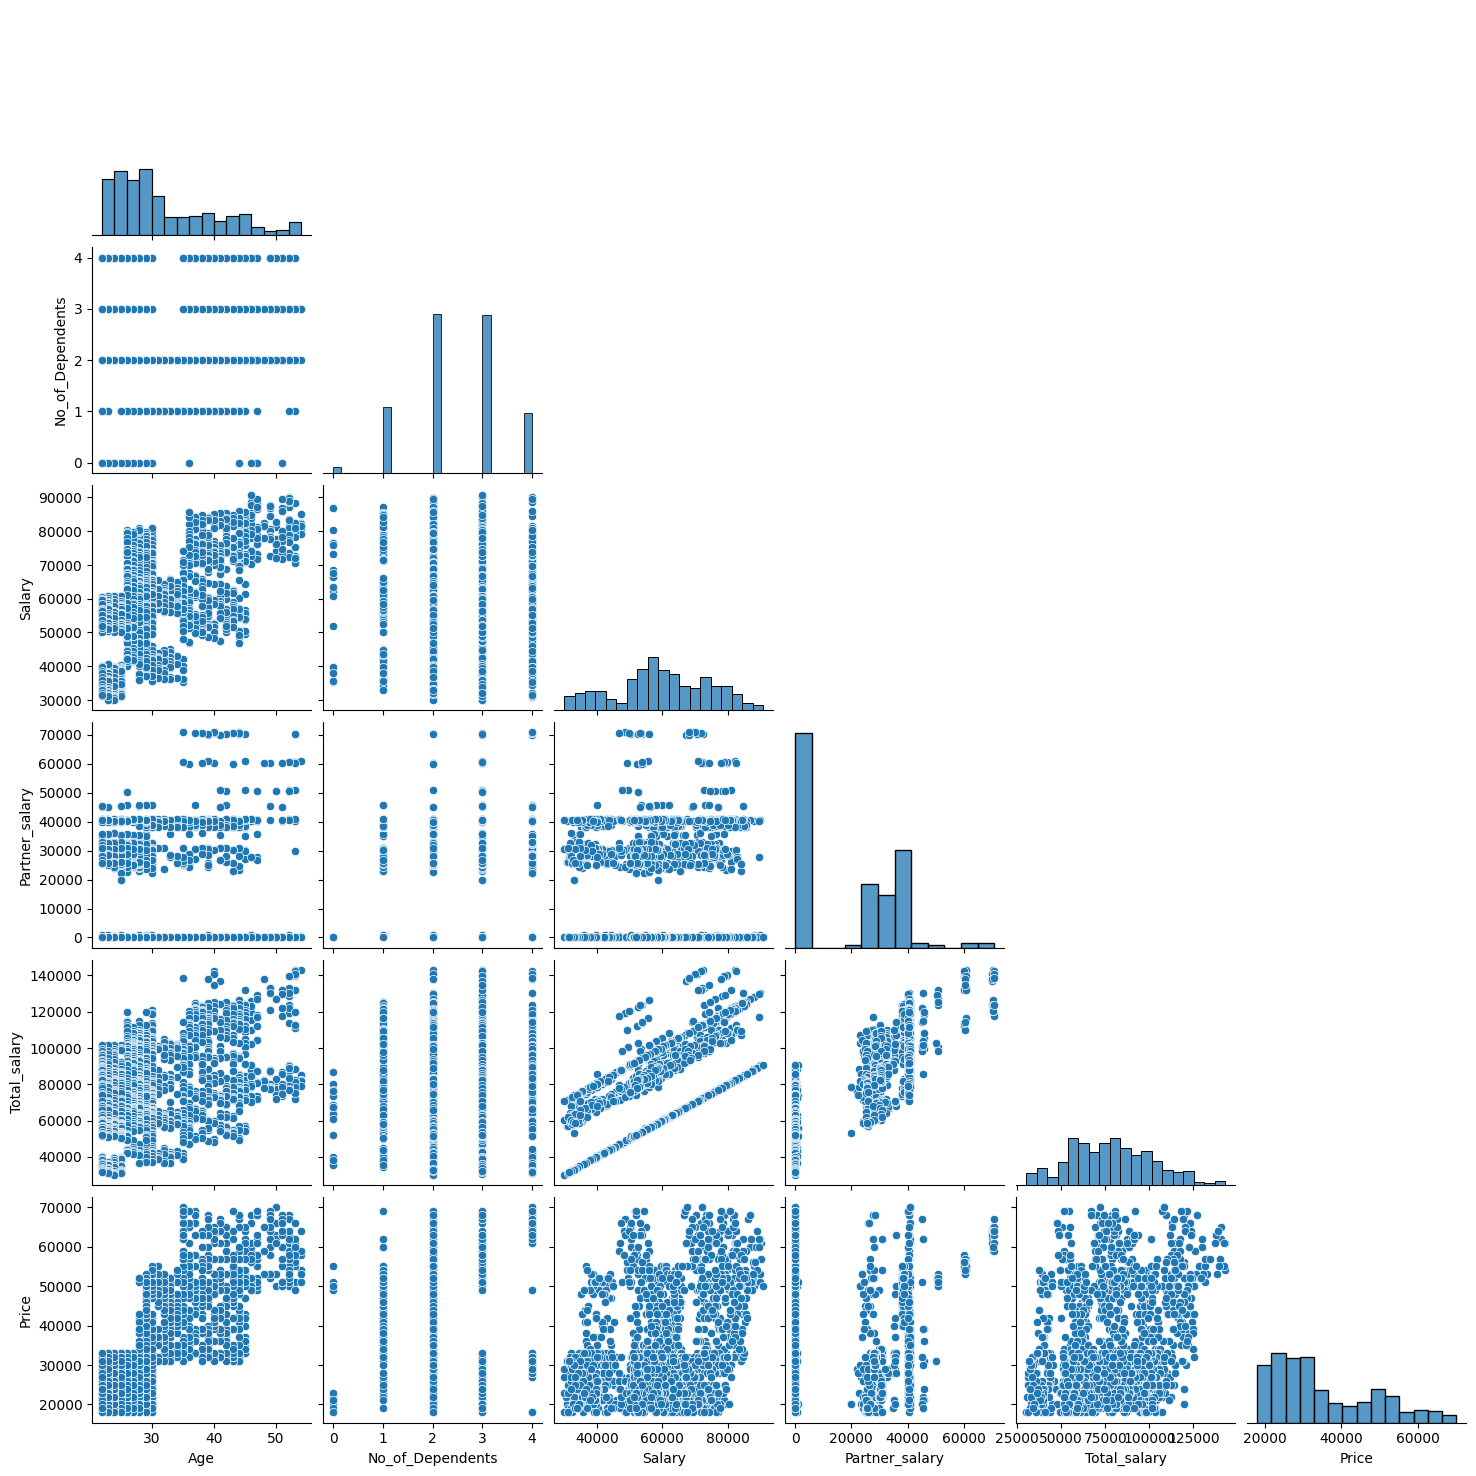

In [32]:
fig = plt.figure(figsize = (10,7))
sns.pairplot(auto_df[numeric_columns], corner=True);

#### Insights from the bivariate analysis of numerical variables
- Age and Salary have a moderate positive correlation which hints at with increasing age salary also increases and so as purchasing power.
- But it seems like Age has a higher correlation with buying costly car than the salary's correlation with price. This may indicate that as one grows older one desires a better car whether or not the salary is high.
- Salary and Partner_salary have high correlation with Total_salary which is not a relevant information as Total_salary is derived from them.
- As we observed in the categorical variable analysis, Partner_working does not play a significant role towards a higher cost car and that shows here as well. Partner_salary is very mildly correlated with Price of the car.

#### Categorical v/s Categorical

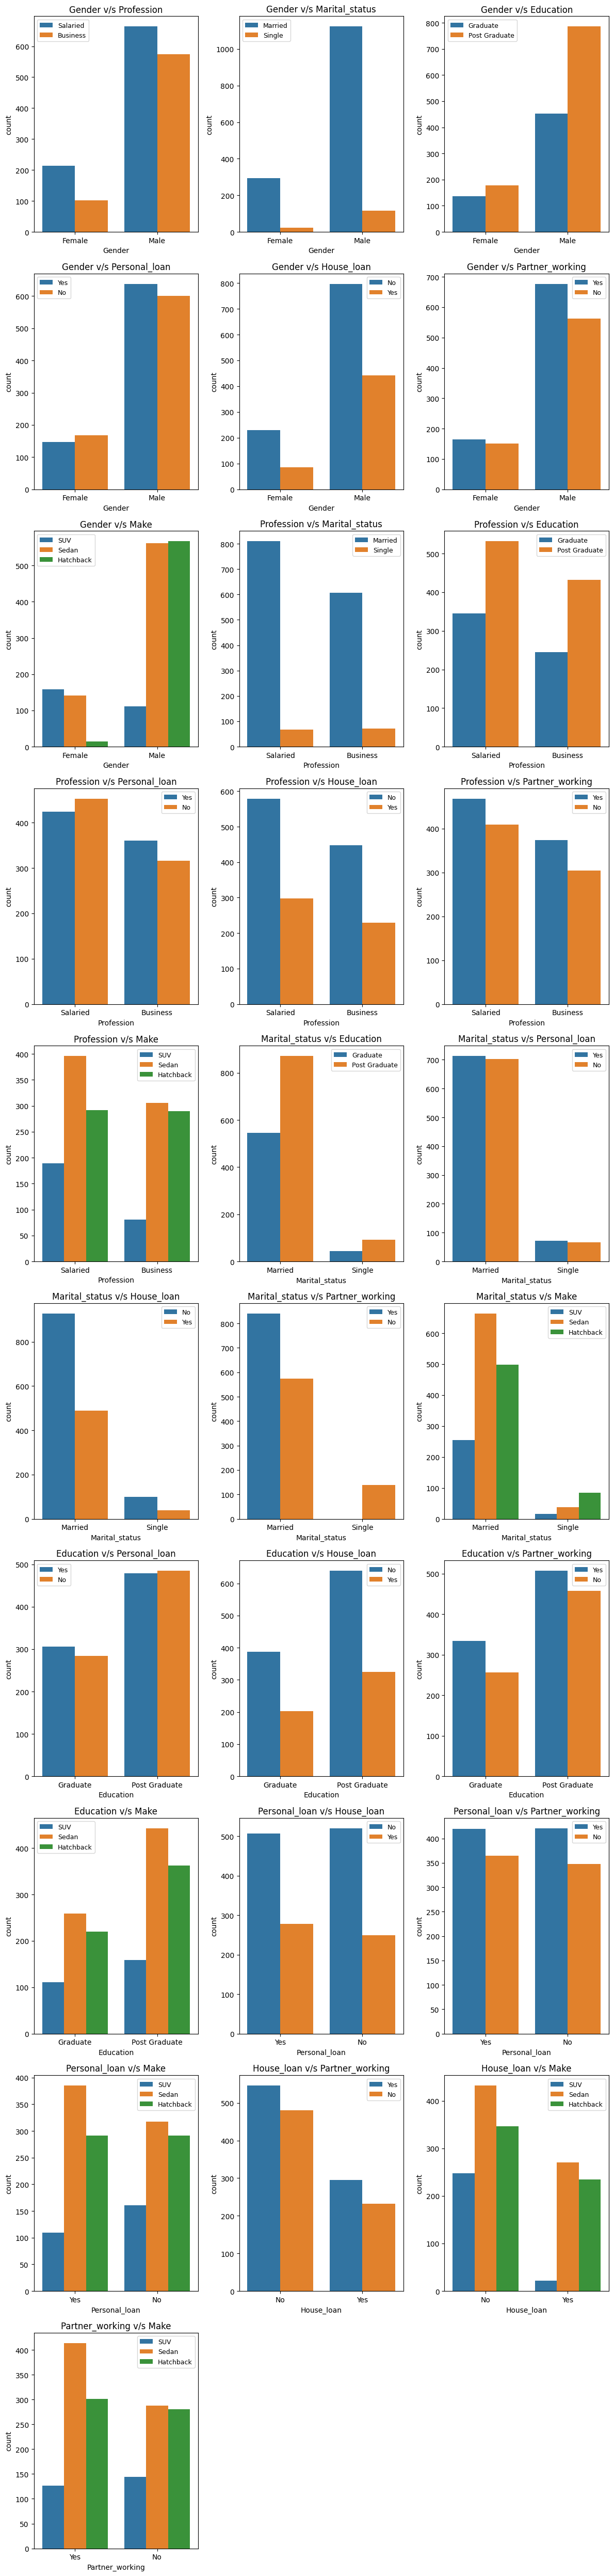

In [33]:
plt.figure(figsize=(12,50))
c = 1
for i in range(0,len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        plt.subplot(10,3,c)
        sns.countplot(data=auto_df, x=categorical_columns[i], hue=categorical_columns[j])
        plt.title(f'{categorical_columns[i]} v/s {categorical_columns[j]}')
        plt.legend(fontsize=9)
        c += 1

plt.tight_layout();

### Remarks made by employees about the dataset
Employees working on the existing marketing campaign have made a few remarks (provided in the description). Conduct an analysis and state whether you agree or disagree with them, with proper justification based on the data available
1) Steve Roger believes that men prefer SUV by a large margin compared to the women.
2) Ned Stark believes that a salaried person is more likely to buy a Sedan.
3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan sale

<b>
    1) Steve Roger believes that men prefer SUV by a large margin compared to the women.
</b>

In [34]:
pd.crosstab(auto_df['Gender'],auto_df['Make'], margins=True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,15,159,141,315
Male,567,111,561,1239
All,582,270,702,1554


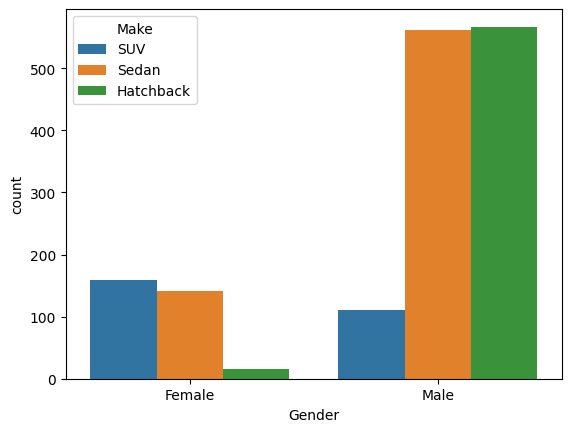

In [35]:
sns.countplot(data=auto_df, x='Gender', hue='Make');

We do not agree with the first statement, as from the graph, we can see that Women prefer SUV over Men and not the other way around. Out of total Female customers i.e. 315, 159 of them preferred SUV against 111 out of total 1239 Men.

<b>
    2) Ned Stark believes that a salaried person is more likely to buy a Sedan.
</b>

In [36]:
pd.crosstab(auto_df['Profession'],auto_df['Make'], margins=True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,290,81,306,677
Salaried,292,189,396,877
All,582,270,702,1554


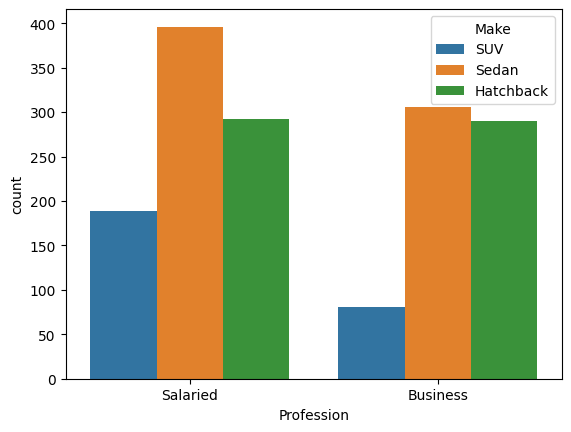

In [37]:
sns.countplot(data=auto_df, x='Profession', hue='Make');

We agree with the above statement, as we notice from the graph that a salaried person preferred Sedan over any other kind of car. As observed, Salaried customers bought 396 Sedan cars against 292 Hatchback and 189 SUV cars.

<b>
    3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan sale.
</b>

In [38]:
pd.crosstab(auto_df['Make'],[auto_df.Profession, auto_df.Gender], margins=True)

Profession Business      Salaried        All
Gender       Female Male   Female Male      
Make                                        
Hatchback         0  290       15  277   582
SUV              52   29      107   82   270
Sedan            50  256       91  305   702
All             102  575      213  664  1554

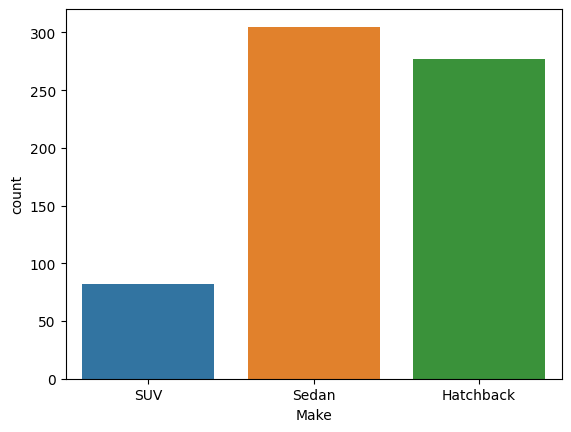

In [39]:
sns.countplot(data=auto_df[(auto_df.Profession=='Salaried')&(auto_df.Gender=='Male')], x='Make');

We do not agree with the statement as a Salaried Male like Sedan more than a SUV as per the Data. Furthermore going by the numbers, Salaried Male Customers have purchesed 305 Sedan cars as compared to only 82 SUV cars.

### Does the amount spent on purchasing automobiles differ across the following attributes?
1) Gender
2) Existence of Personal Loan

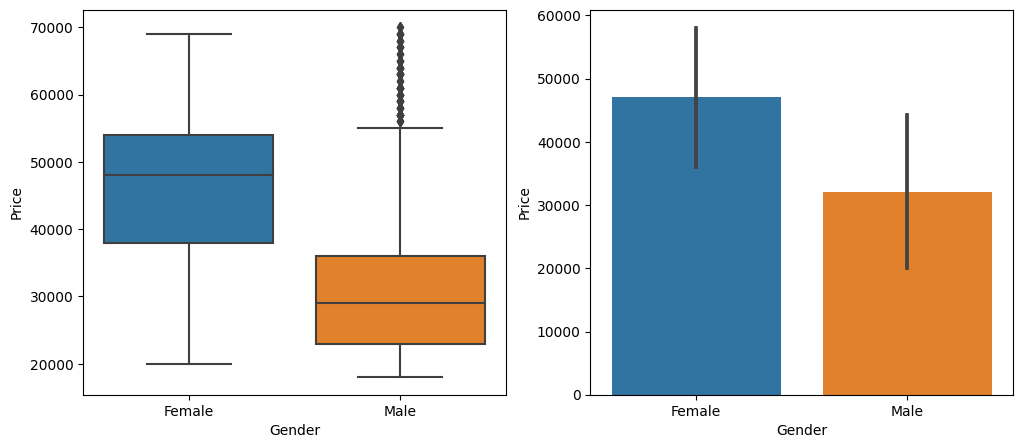

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=auto_df, x="Gender", y="Price")
plt.subplot(1,2,2)
sns.barplot(data=auto_df, x='Gender', y='Price', errorbar=('sd', True));

In [41]:
auto_df.groupby(['Gender'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,315.0,47031.746032,10970.963782,20000.0,38000.0,48000.0,54000.0,69000.0
Male,1239.0,32119.451170,12074.764444,18000.0,23000.0,29000.0,36000.0,70000.0


For the amount spent on automobiles, there is a specific correlation with gender. The graphs show the same. <b>Females prefer high priced cars than males</b>.

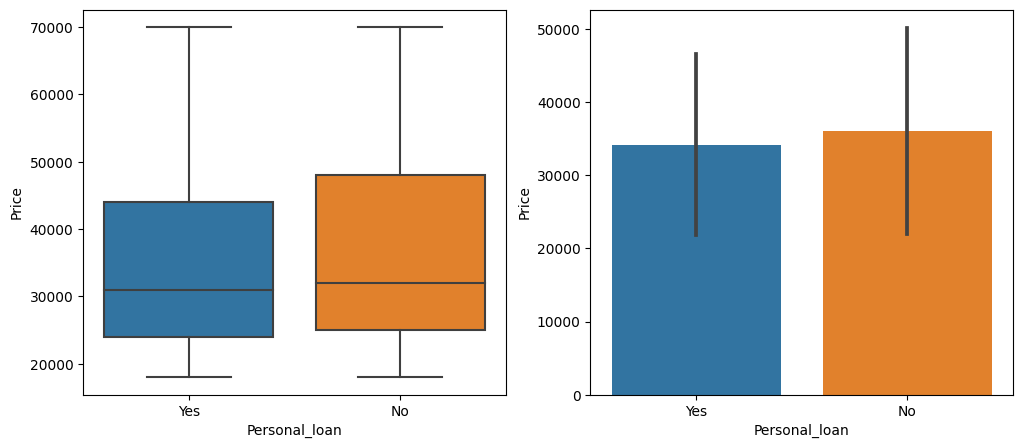

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=auto_df, x="Personal_loan", y="Price")
plt.subplot(1,2,2)
sns.barplot(data=auto_df, x='Personal_loan', y='Price', errorbar=('sd', True));

In [43]:
auto_df.groupby(['Personal_loan'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,769.0,36087.126138,14112.695717,18000.0,25000.0,32000.0,48000.0,70000.0
Yes,785.0,34216.560510,12362.673448,18000.0,24000.0,31000.0,44000.0,70000.0


For amount spent on automobiles, <b>there is no significant correlation with presence of personal loan</b>. The purchasing power of the customer is slightly higher in absence of a personal loan but cannot be called a factor for not buying a car.</br>
Statistically, the range of price of car bought by customer with and without personal loan is same and the IQR isn't significantly different either.

### Does having a working partner leads to purchase of a higher priced car?

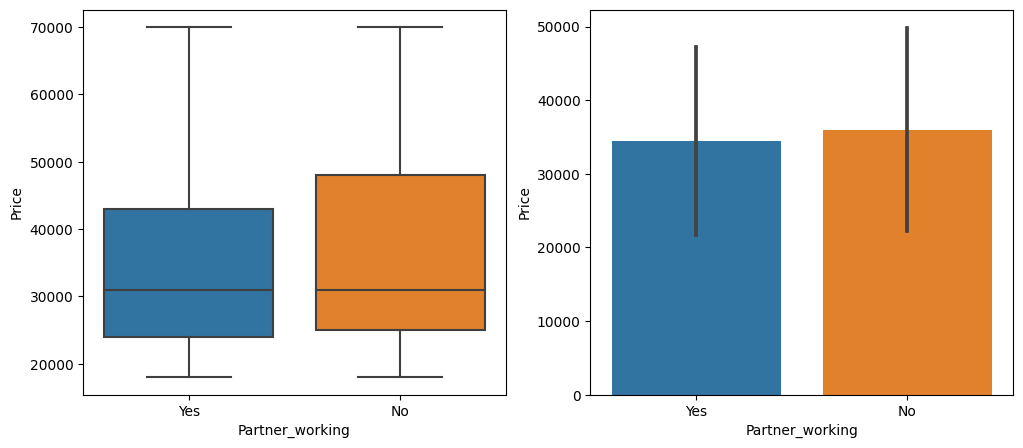

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=auto_df, x="Partner_working", y="Price")
plt.subplot(1,2,2)
sns.barplot(data=auto_df, x='Partner_working', y='Price', errorbar=('sd', True));

In [45]:
auto_df.groupby(['Partner_working'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,713.0,36000.000000,13817.734086,18000.0,25000.0,31000.0,48000.0,70000.0
Yes,841.0,34414.982164,12781.691297,18000.0,24000.0,31000.0,43000.0,70000.0


We notice that there is <b>no correlation between a working partner and the higher price of the car</b>.

### Devise an improved marketing strategy to send targeted information to different groups of potential buyers

For devising improved marketing strategy to send targeted information to different groups of potential buyers, we have used the variables namely - Gender and Martial_status to arrive at specific target groups.


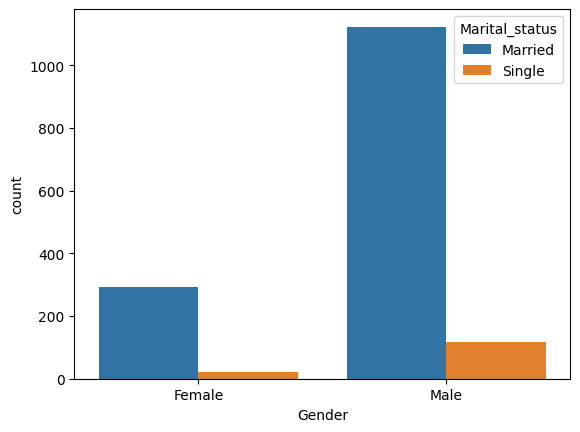

In [46]:
sns.countplot(data=auto_df, x='Gender', hue='Marital_status');

In [47]:
pd.crosstab(auto_df['Gender'],auto_df['Marital_status'], margins=True)

Marital_status,Married,Single,All
Gender,,,
Female,293,22,315
Male,1123,116,1239
All,1416,138,1554


We have further analysed, that for this grouping based on Gender and Martial_status, what are the different models, the various groups prefer. The details are as follows:


In [48]:
pd.crosstab(auto_df['Make'],[auto_df['Marital_status'], auto_df['Gender']], margins=True)

Marital_status Married       Single        All
Gender          Female  Male Female Male      
Make                                          
Hatchback           14   484      1   83   582
SUV                152   102      7    9   270
Sedan              127   537     14   24   702
All                293  1123     22  116  1554